# Kelompok 6
Nama anggota:
- Faisal Surya Saputra (103012330152)
- Yudis Akbar
- Caesar Gian

Sumber dataset https://www.kaggle.com/datasets/faisalwp/dataset-klasifikasi-status-pinjaman/data

## Import Library & Tools.
Mengimport semua library & tools yang akan digunakan untuk mengolah dan memprediksi `status_pinjaman`

In [ ]:
import kagglehub

# get data
path = kagglehub.dataset_download("ardava/dataset-klasifikasi-status-pinjaman")

print("Path to dataset files:", path)

100%|██████████| 1.64M/1.64M [00:00<00:00, 96.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ardava/dataset-klasifikasi-status-pinjaman/versions/1


In [ ]:
import os
import pandas as pd
import numpy as np

#Visualisasi Data
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, TargetEncoder
from sklearn.model_selection import train_test_split

# algoritma machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# metrics Pra-pemrosesan Data
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report


In [ ]:
# read data
df = pd.read_csv(os.path.join(path, 'data.csv'))

# 5 data
df.head()

,id_pelanggan,usia,status_pekerjaan,lama_bekerja_tahun,pendapatan_tahunan,skor_kredit,lama_riwayat_kredit_tahun,aset_tabungan,hutang_saat_ini,gagal_bayar_tercatat,tunggakan_2thn_terakhir,catatan_negatif,tipe_produk,tujuan_pinjaman,jumlah_pinjaman,suku_bunga,rasio_hutang_terhadap_pendapatan,rasio_pinjaman_terhadap_pendapatan,rasio_pembayaran_terhadap_pendapatan,status_pinjaman
0,CUST100000,40.0,Bekerja,17.2,25579,692,5.3,895,10820,0,0,0,Kartu Kredit,Bisnis,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33.0,Bekerja,7.3,43087,627,3.5,169,16550,0,1,0,Pinjaman Pribadi,Renovasi Rumah,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42.0,Mahasiswa,1.1,20840,689,8.4,17,7852,0,0,0,Kartu Kredit,Konsolidasi Hutang,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53.0,Mahasiswa,0.5,29147,692,9.8,1480,11603,0,1,0,Kartu Kredit,Bisnis,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32.0,Bekerja,12.5,63657,630,7.2,209,12424,0,0,0,Pinjaman Pribadi,Pendidikan,99600,13.92,0.195,1.565,0.522,1


Menghapus `id_pelanggan` karena kolom tersebut tidak memberikan informasi.

In [ ]:
#inplace == true karena default false

df.drop(columns=['id_pelanggan'], inplace=True)

df.columns

Index(['usia', 'status_pekerjaan', 'lama_bekerja_tahun', 'pendapatan_tahunan',
       'skor_kredit', 'lama_riwayat_kredit_tahun', 'aset_tabungan',
       'hutang_saat_ini', 'gagal_bayar_tercatat', 'tunggakan_2thn_terakhir',
       'catatan_negatif', 'tipe_produk', 'tujuan_pinjaman', 'jumlah_pinjaman',
       'suku_bunga', 'rasio_hutang_terhadap_pendapatan',
       'rasio_pinjaman_terhadap_pendapatan',
       'rasio_pembayaran_terhadap_pendapatan', 'status_pinjaman'],
      dtype='object')

Cek data duplikat dan missing values

In [ ]:
print(f'Duplicate data: {df.duplicated().sum()}')
print(f'Missing values: {df.isna().sum().sum()}')

Duplicate data: 0
Missing values: 300


Disini terlihat ada **147** missing value.

In [ ]:
df.isna().mean()

,0
usia,0.00294
status_pekerjaan,0.00306
lama_bekerja_tahun,0.00000
pendapatan_tahunan,0.00000
skor_kredit,0.00000
lama_riwayat_kredit_tahun,0.00000
aset_tabungan,0.00000
hutang_saat_ini,0.00000
gagal_bayar_tercatat,0.00000
tunggakan_2thn_terakhir,0.00000


Dikarenakan data yang missing itu < 0.05  


Reference:
Dalam statistik, alpha (α) 0.05 adalah tingkat signifikansi umum yang menunjukkan peneliti bersedia menerima risiko 5% untuk melakukan Kesalahan Tipe I (salah menolak hipotesis nol yang sebenarnya benar) saat menguji hipotesis. Nilai ini menetapkan ambang batas keputusan: jika p-value < 0.05, hasil dianggap signifikan secara statistik (menolak H0); jika p-value ≥ 0.05, hasil dianggap tidak signifikan (gagal menolak H0).

In [ ]:
df.dropna(inplace=True)

print(f'Missing values: {df.isna().sum().sum()}')

Missing values: 0


## Eksplorasi Data
Disini kita akan mengeksplor data yang diambil.

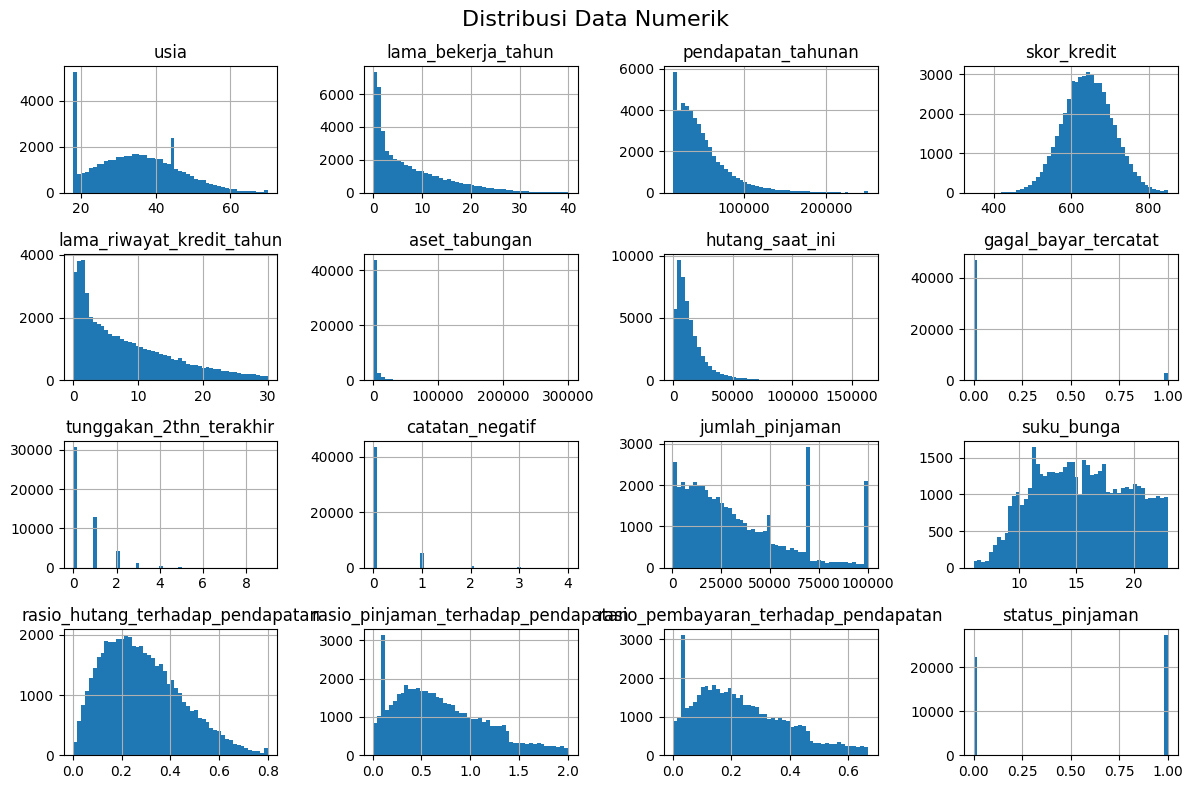

In [ ]:
axes = df.hist(bins=50, figsize=(12, 8));
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik', fontsize=16);
    fig.tight_layout()

Dari distribusi data numerik, bisa dilihat beberapa kolom cenderung skewed atau miring, ini akan memengaruhi penggunaan model yang algoritmanya berbasis **distance-learning** dan **linear-based learning**.

Maka dari itu, kita nanti akan men-transformasi data skewed menjadi distribusi normal

In [ ]:
df['status_pinjaman'].value_counts()

,count
status_pinjaman,
1,27360
0,22340


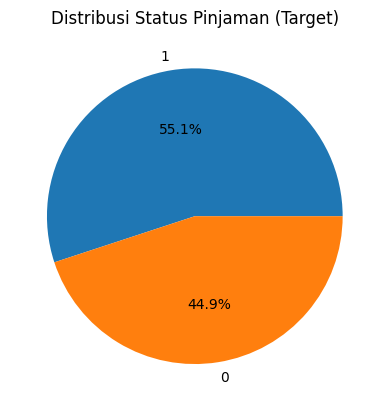

In [ ]:
target_counts = df['status_pinjaman'].value_counts()

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Distribusi Status Pinjaman (Target)')
plt.show()

Dari variabel targetnya, sudah terlihat balanced. Jadi tidak perlu menghandle kasus imbalanced data

In [ ]:
df.head()

,usia,status_pekerjaan,lama_bekerja_tahun,pendapatan_tahunan,skor_kredit,lama_riwayat_kredit_tahun,aset_tabungan,hutang_saat_ini,gagal_bayar_tercatat,tunggakan_2thn_terakhir,catatan_negatif,tipe_produk,tujuan_pinjaman,jumlah_pinjaman,suku_bunga,rasio_hutang_terhadap_pendapatan,rasio_pinjaman_terhadap_pendapatan,rasio_pembayaran_terhadap_pendapatan,status_pinjaman
0,40.0,Bekerja,17.2,25579,692,5.3,895,10820,0,0,0,Kartu Kredit,Bisnis,600,17.02,0.423,0.023,0.008,1
1,33.0,Bekerja,7.3,43087,627,3.5,169,16550,0,1,0,Pinjaman Pribadi,Renovasi Rumah,53300,14.10,0.384,1.237,0.412,0
2,42.0,Mahasiswa,1.1,20840,689,8.4,17,7852,0,0,0,Kartu Kredit,Konsolidasi Hutang,2100,18.33,0.377,0.101,0.034,1
3,53.0,Mahasiswa,0.5,29147,692,9.8,1480,11603,0,1,0,Kartu Kredit,Bisnis,2900,18.74,0.398,0.099,0.033,1
4,32.0,Bekerja,12.5,63657,630,7.2,209,12424,0,0,0,Pinjaman Pribadi,Pendidikan,99600,13.92,0.195,1.565,0.522,1


In [ ]:
categorical_cols = ['status_pekerjaan', 'tipe_produk', 'tujuan_pinjaman']

# melakukan label encoding di setiap kolom kategorikal
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.head()

,usia,status_pekerjaan,lama_bekerja_tahun,pendapatan_tahunan,skor_kredit,lama_riwayat_kredit_tahun,aset_tabungan,hutang_saat_ini,gagal_bayar_tercatat,tunggakan_2thn_terakhir,catatan_negatif,tipe_produk,tujuan_pinjaman,jumlah_pinjaman,suku_bunga,rasio_hutang_terhadap_pendapatan,rasio_pinjaman_terhadap_pendapatan,rasio_pembayaran_terhadap_pendapatan,status_pinjaman
0,40.0,0,17.2,25579,692,5.3,895,10820,0,0,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33.0,0,7.3,43087,627,3.5,169,16550,0,1,0,2,5,53300,14.10,0.384,1.237,0.412,0
2,42.0,1,1.1,20840,689,8.4,17,7852,0,0,0,0,1,2100,18.33,0.377,0.101,0.034,1
3,53.0,1,0.5,29147,692,9.8,1480,11603,0,1,0,0,0,2900,18.74,0.398,0.099,0.033,1
4,32.0,0,12.5,63657,630,7.2,209,12424,0,0,0,2,3,99600,13.92,0.195,1.565,0.522,1


### Transformasi Variabel Skewed / Miring
Kita akan melakukan transformasi variabel miring agar menjadi distribusi normal / gaussian.

- pendapatan_tahunan
- aset_tabungan (sangat skewed, wajib di-transform)
- lama_bekerja_tahun
- hutang_saat_ini
- jumlah_pinjaman

In [ ]:
# konversi skewed ke distribusi normal menggunakan log-transformation
df['pendapatan_tahunan'] = np.log1p(df['pendapatan_tahunan'])
df['aset_tabungan'] = np.log1p(df['aset_tabungan'])
df['lama_bekerja_tahun'] = np.log1p(df['lama_bekerja_tahun'])
df['hutang_saat_ini'] = np.log1p(df['hutang_saat_ini'])
df['jumlah_pinjaman'] = np.log1p(df['jumlah_pinjaman'])
df['lama_riwayat_kredit_tahun'] = np.log1p(df['lama_riwayat_kredit_tahun'])
df['rasio_hutang_terhadap_pendapatan'] = np.log1p(df['rasio_hutang_terhadap_pendapatan'])
df['rasio_pinjaman_terhadap_pendapatan'] = np.log1p(df['rasio_pinjaman_terhadap_pendapatan'])
df['rasio_pembayaran_terhadap_pendapatan'] = np.log1p(df['rasio_hutang_terhadap_pendapatan'])


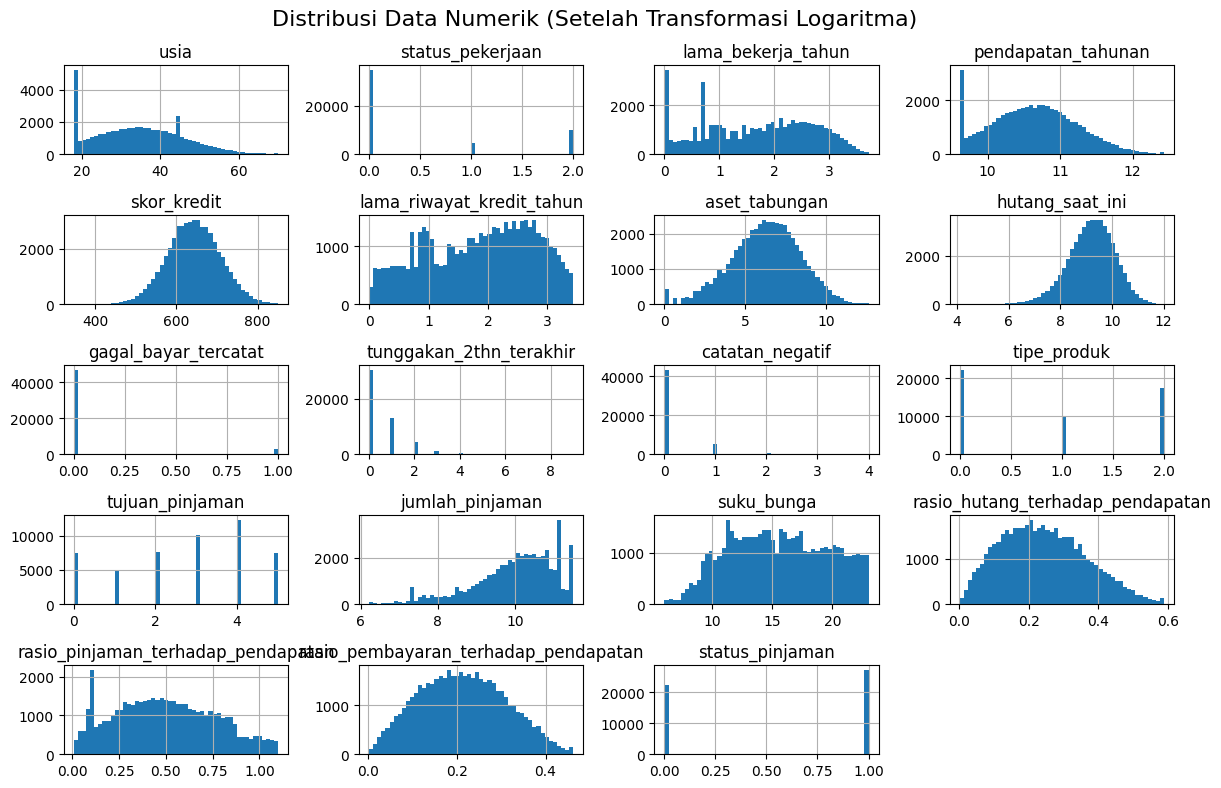

In [ ]:
axes = df.hist(bins=50, figsize=(12, 8));
if axes.size > 0:
    fig = axes.flatten()[0].figure
    fig.suptitle('Distribusi Data Numerik (Setelah Transformasi Logaritma)', fontsize=16);
    fig.tight_layout()

Setelah dilakukan transformasi feature data yang miring / skewed, data sudah terlihat mendekati distribusi normal. Hal ini diperlukan untuk memenuhi syarat algoritma model **distance-based learning** & **linear-based learning** terpenuhi agar hasilnya optimal.

## Pembagian Dataset (Train, Val, Test)
Disini kita akan menggunakan split train:val:test dengan proporsi 80:10:10.

In [ ]:
X = df.drop(columns=['status_pinjaman'])
y = df['status_pinjaman']

# split pertama : 80% train, 20% for val+test
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y # stratify untuk maintain balance
)

# split kedua: 10% val, 10% test from the 20% temp set
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5, # 0.5 of 20% is 10% of total
    random_state=42,
    stratify=y_temp # stratify untuk maintain balance
)

## Pemodelan
Model yang akan diuji adalah: KNN, Decision Tree, Naive bayes.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def display_confusion_matrix(y_true, y_pred, nama_model="Model"):
    plt.figure(figsize=(6, 5))

    ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=['Lancar (0)', 'Kredit Macet (1)'],
        cmap='Blues',
        values_format='d',
        colorbar=False
    )

    plt.title(f"Confusion Matrix: {nama_model}")
    plt.grid(False)
    plt.show()

Naive Bayes

In [ ]:
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

print(f'Akurasi Naive Bayes: {accuracy_score(y_val, model_nb.predict(X_val))}')
print(f'Precision Naive Bayes: {precision_score(y_val, model_nb.predict(X_val))}')
print(f'Recall Naive Bayes: {recall_score(y_val, model_nb.predict(X_val))}')

Akurasi Naive Bayes: 0.7235412474849094
Precision Naive Bayes: 0.6675688976377953
Recall Naive Bayes: 0.991593567251462


<Figure size 600x500 with 0 Axes>

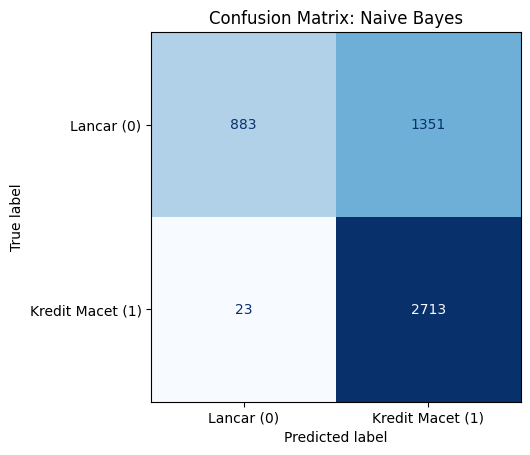

In [ ]:
display_confusion_matrix(y_val, model_nb.predict(X_val), "Naive Bayes")

KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# cv=5 berarti menggunakan 5-fold Cross Validation
# scoring='accuracy' bisa diganti 'recall' jika ingin fokus meminimalisir kredit macet
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # menggunakan semua core CPU agar lebih cepat
    verbose=1
)

grid_search_knn.fit(X_train, y_train)

best_params = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_

y_pred_knn = best_knn_model.predict(X_val)

In [ ]:
print("-" * 30)
print("HASIL EVALUASI KNN (GRID SEARCH)")
print("-" * 30)
print(f'Akurasi KNN   : {accuracy_score(y_val, y_pred_knn):.4f}')
print(f'Precision KNN : {precision_score(y_val, y_pred_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_val, y_pred_knn):.4f}')
print("-" * 30)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn))

------------------------------
HASIL EVALUASI KNN (GRID SEARCH)
------------------------------
Akurasi KNN   : 0.8018
Precision KNN : 0.7766
Recall KNN    : 0.8984
------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      2234
           1       0.78      0.90      0.83      2736

    accuracy                           0.80      4970
   macro avg       0.81      0.79      0.79      4970
weighted avg       0.81      0.80      0.80      4970



<Figure size 600x500 with 0 Axes>

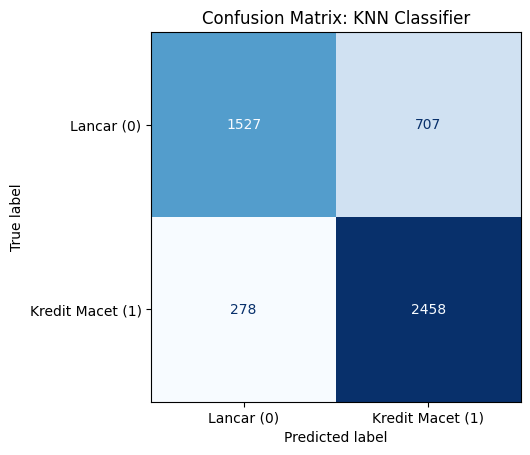

In [ ]:
display_confusion_matrix(y_val, best_knn_model.predict(X_val), "KNN Classifier")

Decision Tree

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # pengukuran kualitas split
    'max_depth': [None, 5, 10, 15, 20],        # kedalaman pohon (None = sampai habis)
    'min_samples_split': [2, 5, 10],           # minimal sampel untuk membelah node
    'min_samples_leaf': [1, 2, 4]              # minimal sampel di node paling ujung (daun)
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), # random_state agar hasil konsisten
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy', # bisa diganti 'recall' jika ingin prioritaskan deteksi kredit yg macet
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [ ]:
print("-" * 35)
print("HASIL EVALUASI DECISION TREE")
print("-" * 35)
print(f'Akurasi DT   : {accuracy_score(y_val, y_pred_dt):.4f}')
print(f'Precision DT : {precision_score(y_val, y_pred_dt):.4f}')
print(f'Recall DT    : {recall_score(y_val, y_pred_dt):.4f}')
print("-" * 35)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt))

-----------------------------------
HASIL EVALUASI DECISION TREE
-----------------------------------
Akurasi DT   : 0.8990
Precision DT : 0.8941
Recall DT    : 0.9262
-----------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2234
           1       0.89      0.93      0.91      2736

    accuracy                           0.90      4970
   macro avg       0.90      0.90      0.90      4970
weighted avg       0.90      0.90      0.90      4970



<Figure size 600x500 with 0 Axes>

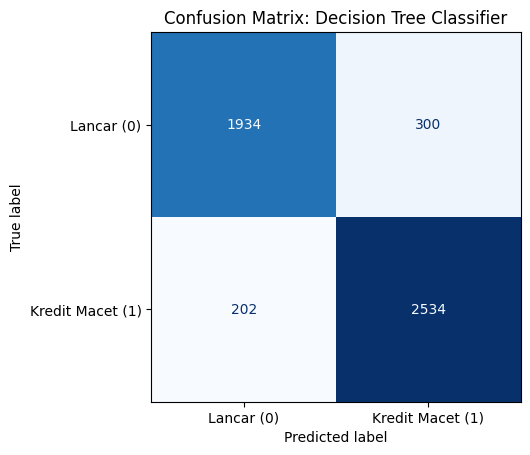

In [ ]:
display_confusion_matrix(y_val, best_dt_model.predict(X_val), "Decision Tree Classifier")

## Evaluasi di data test

Naive Bayes

In [ ]:
test_preds_nb = model_nb.predict(X_test)


print(f'Akurasi Naive Bayes: {accuracy_score(y_test, test_preds_nb)}')
print(f'Precision Naive Bayes: {precision_score(y_test, test_preds_nb)}')
print(f'Recall Naive Bayes: {recall_score(y_test, test_preds_nb)}')

Akurasi Naive Bayes: 0.7207243460764587
Precision Naive Bayes: 0.666501976284585
Recall Naive Bayes: 0.9861111111111112


<Figure size 600x500 with 0 Axes>

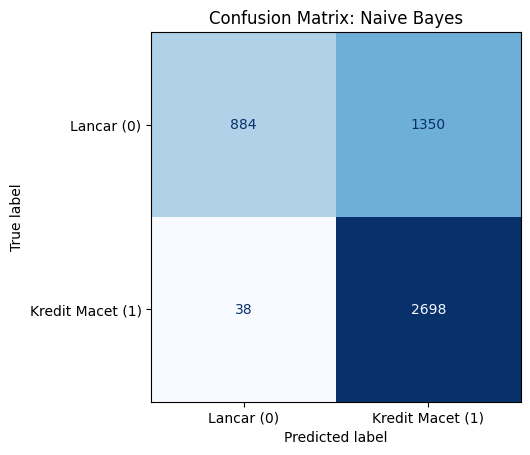

In [ ]:
display_confusion_matrix(y_test, model_nb.predict(X_test), "Naive Bayes")

KNN

In [ ]:
test_preds_knn = best_knn_model.predict(X_test)

print(f'Akurasi KNN   : {accuracy_score(y_test, test_preds_knn):.4f}')
print(f'Precision KNN : {precision_score(y_test, test_preds_knn):.4f}')
print(f'Recall KNN    : {recall_score(y_test, test_preds_knn):.4f}')

Akurasi KNN   : 0.7869
Precision KNN : 0.7661
Recall KNN    : 0.8823


<Figure size 600x500 with 0 Axes>

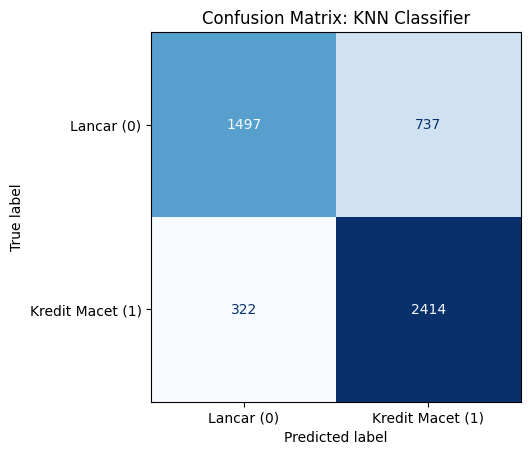

In [ ]:
display_confusion_matrix(y_test, best_knn_model.predict(X_test), "KNN Classifier")

Decision Tree

In [ ]:
test_preds_dt = best_dt_model.predict(X_test)

print(f'Akurasi KNN   : {accuracy_score(y_test, test_preds_dt):.4f}')
print(f'Precision KNN : {precision_score(y_test, test_preds_dt):.4f}')
print(f'Recall KNN    : {recall_score(y_test, test_preds_dt):.4f}')

Akurasi KNN   : 0.8829
Precision KNN : 0.8776
Recall KNN    : 0.9148


<Figure size 600x500 with 0 Axes>

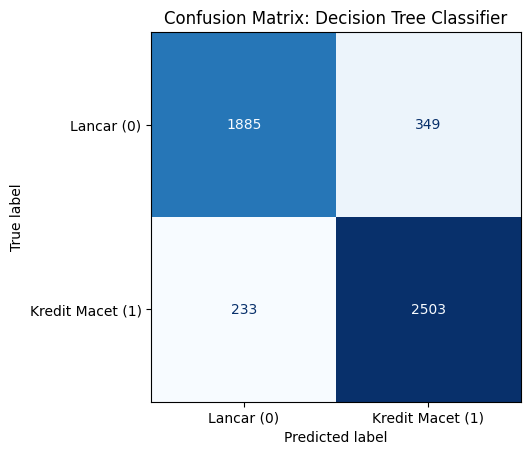

In [ ]:
display_confusion_matrix(y_test, best_dt_model.predict(X_test), "Decision Tree Classifier")

## Kesimpulan
1. RINGKASAN DATA & PREPROCESSING
   - Dataset diambil dari Kaggle ("dataset-klasifikasi-status-pinjaman") dan terdiri dari data nasabah (usia, pekerjaan, pendapatan, histori kredit, dll).
   - Data Cleaning: Kolom 'id_pelanggan' dihapus karena tidak relevan. Baris dengan missing values dihapus (jumlahnya <5% dari total data).
   - Transformasi Data: Diterapkan Log Transformation (np.log1p) pada variabel numerik yang memiliki distribusi miring (skewed) seperti 'pendapatan_tahunan', 'aset_tabungan', dan 'hutang_saat_ini' agar mendekati distribusi normal.
   - Data Splitting: Data dibagi dengan proporsi 80% Train, 10% Validation, dan 10% Test.
   - Keseimbangan Data: Target 'status_pinjaman' sudah seimbang (Balanced), sehingga tidak memerlukan teknik resampling (seperti SMOTE).

2. EVALUASI MODEL
   Tiga algoritma diuji: Naive Bayes, K-Nearest Neighbors (KNN) dengan GridSearch, dan Decision Tree dengan GridSearch.

   A. Naive Bayes
      - Akurasi (Test): ~72.07%
      - Recall (Test): ~98.6%
      - Catatan: Memiliki recall sangat tinggi namun presisi rendah. Model ini cenderung memprediksi "Macet" secara agresif, mengakibatkan banyak False Positive (nasabah lancar dianggap macet).

   B. K-Nearest Neighbors (KNN) - Optimized
      - Akurasi (Test): ~78.69%
      - Recall (Test): ~88.23%
      - Catatan: Performa moderat, lebih baik dari Naive Bayes secara keseimbangan, namun masih di bawah Decision Tree.

   C. Decision Tree - Optimized (MODEL TERBAIK)
      - Akurasi (Test): ~88.29%
      - Precision (Test): ~87.76%
      - Recall (Test): ~91.48%
      - Catatan: Memberikan keseimbangan terbaik antara memprediksi nasabah lancar dan mendeteksi risiko macet.

3. ANALISIS CONFUSION MATRIX (DECISION TREE - DATA TEST)
   - True Positive (Macet diprediksi Macet): 2.503 (Model berhasil mendeteksi mayoritas kredit macet).
   - True Negative (Lancar diprediksi Lancar): 1.885.
   - False Negative (Macet diprediksi Lancar): 233. (Ini adalah risiko utama bank, angkanya relatif kecil dibanding total data).
   - False Positive (Lancar diprediksi Macet): 349.

4. REKOMENDASI BISNIS
   Berdasarkan hasil evaluasi, model **Decision Tree** adalah pilihan terbaik untuk di-deploy karena:
   1. Memiliki Akurasi tertinggi (~88%) dibanding kandidat lain.
   2. Memiliki nilai Recall yang tinggi (~91%), yang berarti model sangat peka dalam mendeteksi potensi gagal bayar (meminimalisir kerugian finansial bank).
   3. Sifat model Decision Tree yang "White-box" memudahkan bank untuk menjelaskan alasan penolakan atau penerimaan pinjaman kepada nasabah berdasarkan aturan (rules) yang terbentuk.